<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mobile-Service-Provider:-Analysis-of-User-Behavior" data-toc-modified-id="Mobile-Service-Provider:-Analysis-of-User-Behavior-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mobile Service Provider: Analysis of User Behavior</a></span><ul class="toc-item"><li><span><a href="#Description-of-the-data" data-toc-modified-id="Description-of-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description of the data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Enriching" data-toc-modified-id="Data-Enriching-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Enriching</a></span></li><li><span><a href="#Data-Consolidation" data-toc-modified-id="Data-Consolidation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Consolidation</a></span></li><li><span><a href="#Plans-Cost-Calculation" data-toc-modified-id="Plans-Cost-Calculation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plans Cost Calculation</a></span></li><li><span><a href="#Users'-behavior" data-toc-modified-id="Users'-behavior-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Users' behavior</a></span><ul class="toc-item"><li><span><a href="#Calls" data-toc-modified-id="Calls-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Calls</a></span></li><li><span><a href="#Messages" data-toc-modified-id="Messages-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Messages</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Test-statistical-hypotheses" data-toc-modified-id="Test-statistical-hypotheses-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Test statistical hypotheses</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-1---Average-revenue-from-users-using-Ultimate-and-Surf-plans-differs" data-toc-modified-id="Hypothesis-1---Average-revenue-from-users-using-Ultimate-and-Surf-plans-differs-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Hypothesis 1 - Average revenue from users using Ultimate and Surf plans differs</a></span></li><li><span><a href="#Hypothesis-2----Average-revenue-from-users-in-the-NY-NJ-area-is-different-from-that-of-the-users-from-the-other-regions." data-toc-modified-id="Hypothesis-2----Average-revenue-from-users-in-the-NY-NJ-area-is-different-from-that-of-the-users-from-the-other-regions.-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Hypothesis 2  - Average revenue from users in the NY-NJ area is different from that of the users from the other regions.</a></span></li></ul></li><li><span><a href="#General-conclusions" data-toc-modified-id="General-conclusions-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>General conclusions</a></span></li></ul></li></ul></div>

# Mobile Service Provider: Analysis of User Behavior

<div class="alert alert-info"> <b>Project Description</b> 

The Mobile Service Provider operates implements two distinct prepaid plans: Surf and Ultimate. Our goal, as Data Analysts, to comprehensively examine user behavior to verify which plan yields higher revenue and aligns better with the company's budgetary considerations.

The preliminary analysis is based on collected data from a sample of 500 clients, who have opted for either the Surf or Ultimate prepaid plans, to delineate which of the two plans holds greater potential for profitability.

Our insights should unveil the revenue-generation capabilities of each plan and, also offer recommendations for optimizing budget allocation to Mobile Service Provider. </div>

## Description of the data

- Seconds should be rounded up to minutes
- Megabytes should be rouneded to to gigabytes
- Call is rounded up as following: even if the call lasted just one second, it will be counted as one minute. 

Web traffic is not rounded up for individual web sessions. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**The users table (data on users):**

- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- city — user's city of residence
- plan — calling plan name

**The calls table (data on calls):**

- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call


**The messages table (data on texts):**

- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text


**The internet table (data on web sessions):**

- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier


**The plans table (data on the plans):**

- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


**Surf** - Monthly charge: USD20

- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: 10USD

**Surf** - Monthly charge: USD70

- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: 7USD

**Libraries Download**

In [139]:
# Sidetable importing
!pip -qq install sidetable

In [140]:
# Loading all the libraries

import pandas as pd 
import numpy as np
import sidetable as stb

## for statistical analysis
import scipy.stats as stats
import math as mt
from math import factorial
from scipy.stats import norm

# for statistical data visualization
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go  

# for date and time transformation
from datetime import datetime
print('All required libraries has been downloaded successfully ')


All required libraries has been downloaded successfully 


**Load data**

In [141]:
# Load the data file into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv') 
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv')  
users = pd.read_csv('/datasets/megaline_users.csv') 

print('Data has been loaded correctly')

Data has been loaded correctly


## Data Exploration

<div class="alert alert-info"> <b> Data Preparation </b>  
    
Inspecting the loaded dataframes using different methods  </div>

In [142]:
import pandas as pd

def explore_datasets(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Exploring dataset: {dataset_name}")
        print("-" * 40)
        
        # Display the first few rows
        print(f"Head of {dataset_name}:")
        print(dataset.head())
        print("-" * 40)
        
        # Display the last few rows
        print(f"Tail of {dataset_name}:")
        print(dataset.tail())
        print("-" * 40)
        
        # Display the shape (rows, columns)
        print(f"Shape of {dataset_name}: {dataset.shape}")
        print("-" * 40)
        
        # Display basic info about the dataset
        print(f"Info of {dataset_name}:")
        print(dataset.info())
        print("-" * 40)
        
        # Display summary statistics
        print(f"Describe of {dataset_name}:")
        print(dataset.describe())
        print("-" * 40)
        
        # Calculate missing data percentage per column
        missing_percent = (dataset.isnull().sum() / len(dataset)) * 100
        print(f"Missing data percentage in {dataset_name}:\n{missing_percent}")
        print("-" * 40)
        
        # Calculate duplicated values
        duplicated_count = dataset.duplicated().sum()
        print(f"Duplicated values in {dataset_name}: {duplicated_count}")
        print("=" * 40)

# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv') 
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv')  
users = pd.read_csv('/datasets/megaline_users.csv') 

# Create a dictionary of datasets
datasets = {
    'calls': calls,
    'internet': internet,
    'messages': messages,
    'plans': plans,
    'users': users
}

# Call the custom exploration function
explore_datasets(datasets)

Exploring dataset: calls
----------------------------------------
Head of calls:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
----------------------------------------
Tail of calls:
              id  user_id   call_date  duration
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86
----------------------------------------
Shape of calls: (137735, 4)
----------------------------------------
Info of calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  


<div class="alert alert-info"> <b> Comments: First Conclusions after data exploration </b>  
  
A comprehensive analysis of each dataset provided us valuable insights. Here are some thoughts based on the information we got:

**Calls DataFrame:**
- The average call duration of around 6-7 minutes seems reasonable.
- Changing the call durations that are less than 1 minute to 1 minute is a sensible approach.
- Converting the call_date to datetime format is important for accurate time-based analysis.

**Internet DataFrame:**
- It's a good idea to round up mb_used to the nearest integer since that's the company policy.
- The mean and median values for data usage don't have significant differences, indicating relatively stable data consumption  
  patterns.

**Messages DataFrame:**
- Both mean and median for messages are quite close, indicating a balanced distribution of messaging activity.

**Plans DataFrame:**
- The description of the plans and their pricing structure is clear and informative.
- The fact that "Surf" plan offers moderate conditions at a lower price, while the "Ultimate" plan provides unlimited services 
  at a higher cost, aligns with common pricing strategies.

**Users DataFrame:**
- The observation about the high percentage of missing values in the churn_date column is important. We need to handle  
  missing data when analyzing churn.
- Changing data types to datetime and integer formats is a necessary step for accurate analysis.
- The age distribution seems fairly spread out, ranging from 18 to 75 years old.

**Overall:**
- The absence of duplicated data is a positive sign.
- We need to clean data, to check data types, to address mass missing values for accurate and meaningful analysis.
</div>

## Data Enriching

It seems logical to enrich the users dataset by adding a new column 'status' , which can provide valuable information about whether a user is active or non-active based on the presence or absence of a value in the churn_date column.

In [143]:
users.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [144]:
#using the numpy.where() function to label selected elements, based on a condition, adding a new column
users['status'] = np.where(users['churn_date'].isnull(), 'non_active', 'active')

In [145]:
#looking on first ten rows 
users.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,status
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,non_active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,non_active


In [146]:
# Convert reg_date and churn_date to datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y/%m/%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y/%m/%d')

In [147]:
# Rename the original 'city' column to 'area'
users.rename(columns={'city': 'area'}, inplace=True)

# Convert the 'area' column to string data type
users['area'] = users['area'].astype(str)

In [148]:
import re
# Rest of the code remains the same
def extract_city_state(city_string):
    city_state_match = re.match(r'^(.*?),\s*(\w+)\s*(MSA)?$', city_string)
    if city_state_match:
        city = city_state_match.group(1).strip()
        state = city_state_match.group(2).strip()
        return city, state
    else:
        return None, None

# Apply the custom function to the 'area' column
users[['city', 'state']] = users['area'].apply(extract_city_state).apply(pd.Series)

# Drop the original 'area' column
users.drop('area', axis=1, inplace=True)

In [149]:
users.head()

,user_id,first_name,last_name,age,reg_date,plan,churn_date,status,city,state
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,non_active,Seattle-Tacoma-Bellevue,WA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,NaT,non_active,Las Vegas-Henderson-Paradise,NV
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,NaT,non_active,Tulsa,OK
4,1004,Leonila,Thompson,40,2018-05-23,surf,NaT,non_active,Seattle-Tacoma-Bellevue,WA


In [150]:
# grouping the data by year and month to see how many users churned in each month and year
churn_by_month = users.groupby([users['churn_date'].dt.year, users['churn_date'].dt.month]).size()
churn_by_month

churn_date  churn_date
2018.0      7.0            1
            8.0            2
            9.0            4
            10.0           4
            11.0           9
            12.0          14
dtype: int64

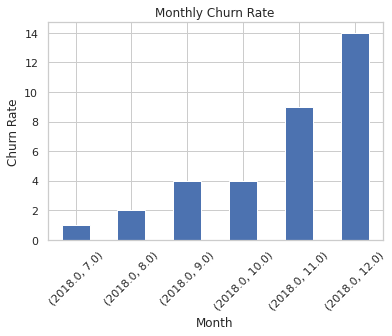

In [151]:
plt.figure(figsize=(6, 4)) 
churn_by_month.plot(kind='bar')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

In [152]:
#group the data by the subscription plan to see how many users churned from each plan
churn_by_plan = users.groupby('plan')['churn_date'].count()
churn_by_plan

plan
surf        23
ultimate    11
Name: churn_date, dtype: int64

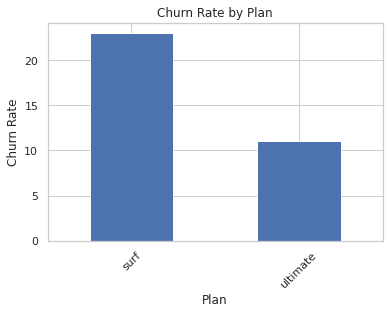

In [153]:
plt.figure(figsize=(6, 4)) 
churn_by_plan.plot(kind='bar')
plt.title('Churn Rate by Plan')
plt.xlabel('Plan')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

In [154]:
# creating age groups
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

users['age_group'] = users['age'].apply(age_group)
churn_rate_by_age_group = users.groupby('age_group')['status'].value_counts(normalize=True).unstack()
churn_rate_by_age_group

status,active,non_active
age_group,,
Middle-aged,0.048193,0.951807
Senior,0.074766,0.925234
Young,0.083333,0.916667


<Figure size 432x576 with 0 Axes>

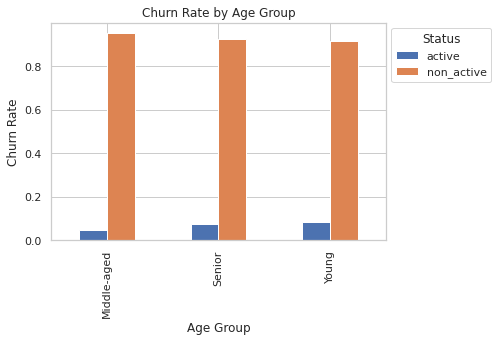

In [155]:
plt.figure(figsize=(6, 8)) 
churn_rate_by_age_group.plot(kind='bar')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [156]:
# grouping the data by state
churn_by_state = users.groupby('state')['churn_date'].count()
churn_by_state = churn_by_state[churn_by_state > 0].sort_values(ascending=True)
churn_by_state

state
AZ    1
HI    1
LA    1
NC    1
NV    1
TN    1
TX    1
WA    1
GA    2
MI    2
CA    4
FL    4
Name: churn_date, dtype: int64

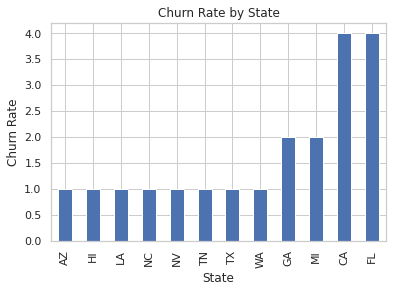

In [157]:
plt.figure(figsize=(6, 4)) 
churn_by_state.plot(kind='bar')
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

<div class="alert alert-info"> <b> Conclusion: </b>  
    
Based on the analysis of the churn data and visualization, we can draw the following conclusions:

**Churn by State:**
   The states with the highest churn rates are Georgia (GA), Michigan (MI), California (CA), and Florida (FL). These regions have a significant number of customers who are discontinuing the service.

**Churn Rate by Age Group:**
   The churn rate analysis by age group indicates that mid-aged customers, likely those in their late 30s to early 60s, tend to exhibit lower churn rates. In contrast, younger customers seem more likely to churn. This suggests that younger customers might be more inclined to explore different service providers or seek unique user experiences.

**Churn by Plan:**
   The analysis of churn by plan reveals that a higher number of customers are churning from the Surf plan. This could be due to various reasons, such as customers exceeding plan limits or not finding the service suitable for their needs.

**Churn by Month:**
   The churn analysis by month indicates that the months of November and December have higher churn rates on average. This could be due to various factors, such as customers evaluating their plans and considering changes during the holiday season or end-of-year reflection.

Overall, these findings highlight the importance of understanding customer behavior and preferences. Further investigation could be conducted to delve deeper into the reasons behind the observed patterns, such as conducting surveys to gather customer feedback and insights. This information could help the mobile service provider make informed decisions to improve customer satisfaction and retention strategies.
</div>

In [158]:
calls.head(2)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66


In [159]:
# rounding the duration of calls
calls['duration'] = np.ceil(calls['duration']).astype('int64')

In [160]:
# Grouping and aggregation
calls_summary = calls.groupby(['call_date', 'duration']).agg(
    total_calls=('user_id', 'count'),
    mean_duration=('duration', 'mean')
).reset_index()
calls_summary

,call_date,duration,total_calls,mean_duration
0,2018-01-15,0,2,0
1,2018-01-15,10,1,10
2,2018-01-15,11,2,11
3,2018-01-16,0,2,0
4,2018-01-16,3,1,3
...,...,...,...,...
8101,2018-12-31,27,2,27
8102,2018-12-31,28,1,28
8103,2018-12-31,29,1,29
8104,2018-12-31,30,1,30


In [161]:
# Convert 'call_date' to datetime format
calls_summary['call_date'] = pd.to_datetime(calls_summary['call_date'])

# Extract year and month
calls_summary['year_month'] = calls_summary['call_date'].dt.to_period('M')

# Group by year and month, calculate mean duration
average_duration_by_month = calls_summary.groupby('year_month')['mean_duration'].mean()

# Display the result
average_duration_by_month

year_month
2018-01     8.220339
2018-02     9.252551
2018-03     9.410256
2018-04    10.691473
2018-05    11.494475
2018-06    12.236702
2018-07    12.213918
2018-08    12.691067
2018-09    13.204938
2018-10    13.254459
2018-11    13.400726
2018-12    13.686207
Freq: M, Name: mean_duration, dtype: float64

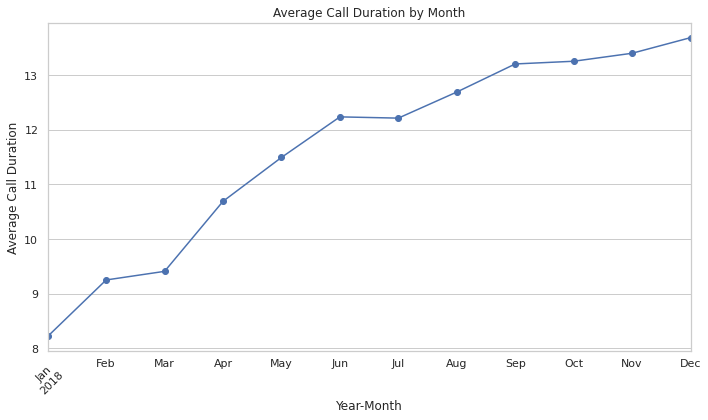

In [162]:
# Plotting the average call duration by month
plt.figure(figsize=(10, 6))
average_duration_by_month.plot(marker='o')
plt.title('Average Call Duration by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Call Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
min_average_duration = average_duration_by_month.min().round()
max_average_duration = average_duration_by_month.max().round()

print("Minimum Average Call Duration:", min_average_duration)
print("Maximum Average Call Duration:", max_average_duration)

Minimum Average Call Duration: 8.0
Maximum Average Call Duration: 14.0


In [164]:
# Convert 'call_date' to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Filter data for December 2018 and January 2018 using query()
december_calls = calls.query("'2018-12-01' <= call_date <= '2018-12-31'").copy()
january_calls = calls.query("'2018-01-01' <= call_date <= '2018-01-31'").copy()

# Extract month and day using .loc indexer
december_calls.loc[:, 'month'] = december_calls['call_date'].dt.month
december_calls.loc[:, 'day'] = december_calls['call_date'].dt.day

january_calls.loc[:, 'month'] = january_calls['call_date'].dt.month
january_calls.loc[:, 'day'] = january_calls['call_date'].dt.day 

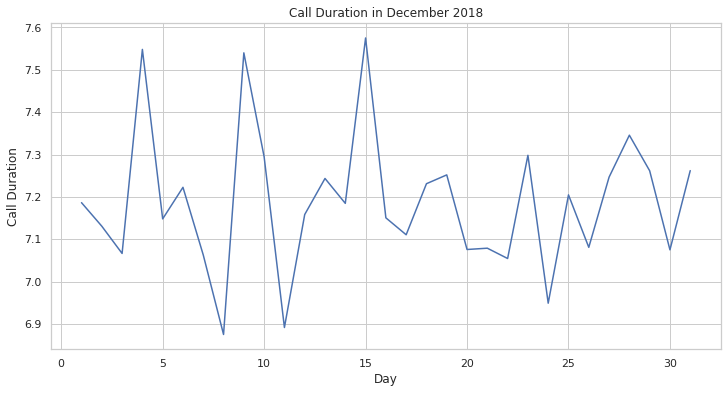

In [165]:
#December Duration of Calls visualization:
plt.figure(figsize=(12, 6))
sns.lineplot(data=december_calls, x='day', y='duration', ci=None)
plt.title('Call Duration in December 2018')
plt.xlabel('Day')
plt.ylabel('Call Duration')
plt.show()

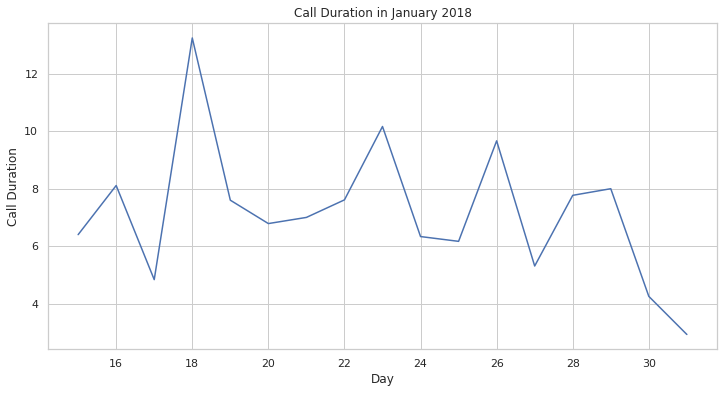

In [166]:
# January Duration of Calls visualization;
plt.figure(figsize=(12, 6))
sns.lineplot(data=january_calls, x='day', y='duration', ci=None)
plt.title('Call Duration in January 2018')
plt.xlabel('Day')
plt.ylabel('Call Duration')
plt.show()

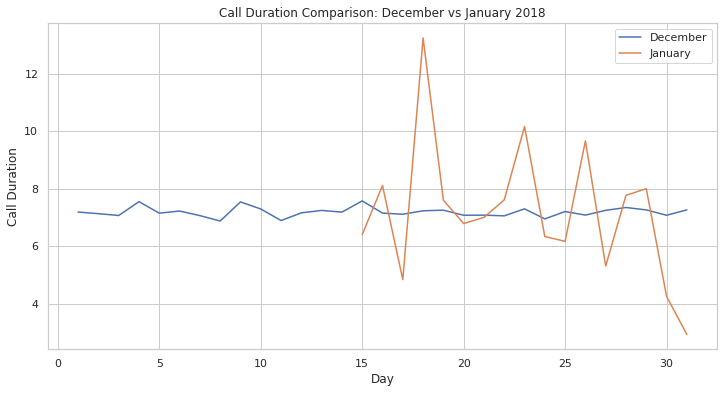

In [167]:
#combined view
plt.figure(figsize=(12, 6))
sns.lineplot(data=december_calls, x='day', y='duration', label='December', ci=None)
sns.lineplot(data=january_calls, x='day', y='duration', label='January', ci=None)
plt.title('Call Duration Comparison: December vs January 2018')
plt.xlabel('Day')
plt.ylabel('Call Duration')
plt.legend()
plt.show()

In [168]:
calls.loc[:, 'month'] = calls['call_date'].dt.month
data_calls=calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
data_calls

user_id month duration     
                      count  sum
0       1000    12       16  124
1       1001     8       27  182
2       1001     9       49  315
3       1001    10       65  393
4       1001    11       64  426
...      ...   ...      ...  ...
2253    1498    12       39  339
2254    1499     9       41  346
2255    1499    10       53  385
2256    1499    11       45  308
2257    1499    12       65  496

[2258 rows x 4 columns]

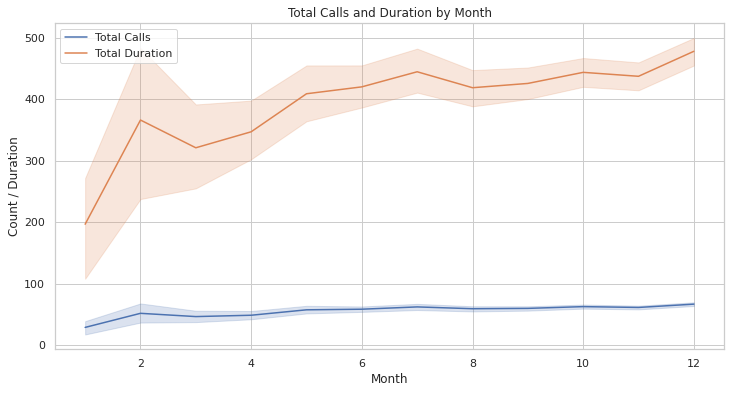

In [169]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_calls, x='month', y=('duration', 'count'), label='Total Calls')
sns.lineplot(data=data_calls, x='month', y=('duration', 'sum'), label='Total Duration')
plt.title('Total Calls and Duration by Month')
plt.xlabel('Month')
plt.ylabel('Count / Duration')
plt.legend()
plt.show()


<div class="alert alert-info"> <b> Observation: </b>  
    
Average Call Duration by Month graph provides insights on callduration dinamycs during the year. We obseved increasing duration of call starting from March-April time. We also verified the average duration of call per month a found that on averge, January was month with the shortest duration of calls and December 2018 - the longest. 
    
However, this was only the brief glance. When we actually visualize two month, we found out that both months had highest peacks throughout the months. The peaks we were observing in the lineplots could be indicative of certain patterns or events that occurred on those specific days, such as:

1. **Special Events or Holidays:** Peaks in call durations could coincide with special events, holidays, or weekends when people might have more free time to make longer calls.
2. **Promotions or Offers:** Peaks could also be associated with promotional offers, discounts, or marketing campaigns that encourage people to make longer calls.
3. **Workdays vs. Weekends:** Call durations might be longer on weekends compared to workdays when people have more time to chat.
4. **Weather Conditions:** Weather conditions could also play a role. For example, people might be more likely to stay indoors and talk on the phone during bad weather.
5. **Social Events:** Peaks could also be related to social events or gatherings that lead to longer conversations.

Analyzing the context of these peaks, considering external factors, and understanding user behavior could help us identify the underlying reasons for these patterns. It would be helpful to gather additional data to validate these theories and gain deeper insights into the observed patterns.
</div>

In [170]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [171]:
#changing datatype
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
#extracting month out of full date
messages['month_msg'] = messages['message_date'].dt.month

In [172]:
#aggregating data per user in pivot table
monthly_msg = messages.pivot_table(index=['user_id','month_msg'], values='id', aggfunc='count')
monthly_msg = monthly_msg.reset_index()

In [173]:
#renaming the columns
monthly_msg.columns = ['user_id', 'month', 'number_msg',]

In [174]:
monthly_msg.head()

,user_id,month,number_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [175]:
monthly_msg.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1806.0,1245.091916,139.583315,1000.0,1126.25,1245.0,1362.0,1497.0
month,1806.0,9.260797,2.443621,1.0,8.00,10.0,11.0,12.0
number_msg,1806.0,42.110188,33.122931,1.0,17.00,34.0,59.0,266.0


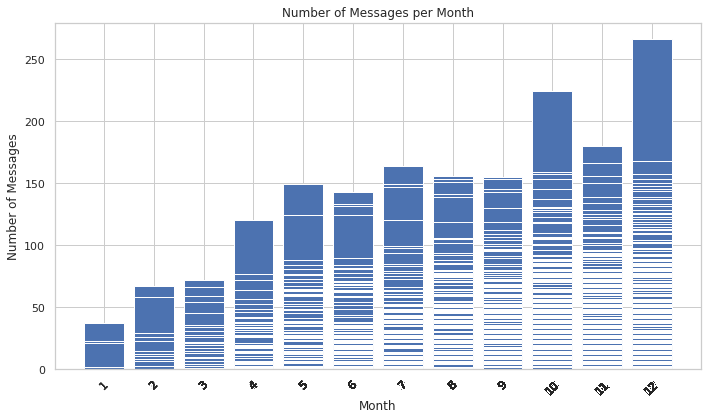

In [176]:
# Sort the DataFrame by the 'number_msg' column
monthly_msg_sorted = monthly_msg.sort_values('number_msg', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_msg_sorted['month'], monthly_msg_sorted['number_msg'])
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per Month')
plt.xticks(monthly_msg_sorted['month'], labels=monthly_msg_sorted['month'], rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-info"> <b> Observation - Messages Dataset: </b> 

**User Distribution:**
   - The dataset includes 1806 unique users.
   - User IDs range from 1000 to 1497, with a mean of approximately 1245. This indicates a relatively even distribution of users.
**Months of Communication:**
   - The data covers the months ranging from 1 to 12, indicating a full year of communication data.
   - The mean month is around 9.26, suggesting that the dataset has data spanning several months.
**Number of Messages:**
   - On average, users send about 42 messages per month.
   - The number of messages per month has a standard deviation of approximately 33.12, indicating a significant variability in message counts.
   - The minimum number of messages sent by a user in a month is 1, while the maximum is 266.
   - 25% of the users send 17 or fewer messages per month, while 50% (median) send 34 or fewer messages. 75% of the users send 59 or fewer messages per month.

Overall, the statistics suggest that users generally send a moderate number of messages each month, with some users sending a significantly higher number. There is variability in communication patterns among users, with some sending very few messages and others sending a substantial amount. The distribution of messages is positively skewed, with a larger number of users having lower message counts and a few users with high message counts.

In addition, the bar graph created from the 'monthly_msg_sorted' data shows the messaging activity distribution across different months. 

- December and October are the most active months in terms of messaging activity. This is reflected by the higher bar heights for these months, suggesting that users sent more messages during these months compared to others.

- On the other hand, the lowest messaging activity is observed in January, February, and March. The bars corresponding to these months are notably shorter, indicating that users sent fewer messages during these months.

Overall, the graph visually illustrates the variation in messaging activity throughout the year, with certain months experiencing higher levels of communication compared to others. This information can be valuable for understanding user behavior and engagement patterns over time.</div>

In [177]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [178]:
# Changing datatype and extracting month
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_month'] = internet['session_date'].dt.month

# Aggregating data per user and month
monthly_inet = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()

# Renaming the columns
monthly_inet.columns = ['user_id', 'month', 'mb_used']

# Converting to gigabytes
monthly_inet['gb_used_mnth'] = np.ceil(monthly_inet['mb_used'] / 1024).astype(int)

# Displaying sample
monthly_inet.head()

,user_id,month,mb_used,gb_used_mnth
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


In [179]:
monthly_inet.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2277.0,1244.925780,142.544823,1000.00,1121.00,1243.00,1367.00,1499.00
month,2277.0,9.177866,2.497183,1.00,8.00,10.00,11.00,12.00
mb_used,2277.0,16882.197501,7869.784848,92.31,12347.72,16873.74,21041.52,70931.59
gb_used_mnth,2277.0,16.989021,7.693683,1.00,13.00,17.00,21.00,70.00


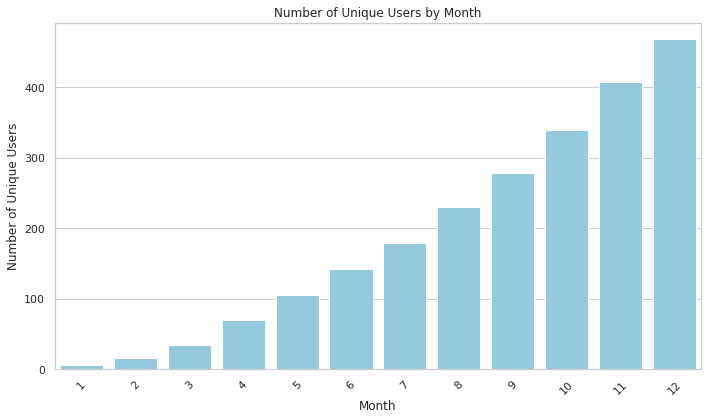

In [180]:
# Calculate the number of unique users for each month
users_per_month = monthly_inet.groupby('month')['user_id'].nunique().reset_index()

# Create a bar plot for unique users per month
plt.figure(figsize=(10, 6))
sns.barplot(data=users_per_month, x='month', y='user_id', color='skyblue')
plt.title('Number of Unique Users by Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-info"> <b> Conclusions - Internet Dataset: </b>

Upon initial examination, no missing values or duplicated data were identified in the dataset. The datatypes of the 'session_date' column were appropriately changed to datetime type. New columns were added to extract the month from the session date and convert the data usage from megabytes (MB) to gigabytes (GB) for more meaningful calculations.

The descriptive statistics for the dataset reveal the following key insights:
- The dataset contains records for 2,277 unique users.
- The 'user_id' values range from 1,000 to 1,499, with an average of approximately 1,244.
- The data spans across the months of January (1) to December (12), with an average month value of approximately 9.
- The average monthly internet usage in megabytes (MB) is around 16,882, with a standard deviation of 7,870 MB.
- The data was further converted to gigabytes (GB) for better interpretation, resulting in an average monthly usage of around 17 GB, with a standard deviation of 7.69 GB.

The visual representation of the data through a bar plot indicates a consistent upward trend in the number of unique users each month. This trend is evident from January 2018 to December 2018, with an increase in the number of users observed each month.

Overall, this analysis provides valuable insights into the monthly internet usage patterns of users, highlighting the growth in user engagement over the course of the year.     
</div>

In [181]:
#Print out the plan conditions and make sure they are clear for you
plans.columns = ['cap_messages', 'cap_mb', 'cap_call_min', 'monthly_charge', 'gb_cost', 'msg_cost', 'min_call_cost', 'plan_name']
plans['cap_gb'] = np.ceil((plans['cap_mb'].values) / 1024).astype(int)

In [182]:
#looking at the sample
plans.head()

,cap_messages,cap_mb,cap_call_min,monthly_charge,gb_cost,msg_cost,min_call_cost,plan_name,cap_gb
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


<div class="alert alert-info"> <b> Conclusion: </b>
    
Two plans differentiate by offered services and by different tariffs for the services provided. Based on our presumption the average revenue from users of Ultimate and Surf calling plans differs. We are going to check this hypothesis.

**Surf**
- Monthly charge: USD20
- 500 monthly minutes
- 50 texts
- data 15 GB
    
*After exceeding the package limits: 
    *1 minute: 3 cents 
    *1 text message: 3 cents 
    *1 GB of data: USD10
    

**Ultimate** 
- Monthly charge: USD70
- 3000 monthly minutes 
- 1000 text messages
- Data 30 GB 
    
*After exceeding the package limits: 
    *1 minute: 1 cent 
    *1 text message: 1 cent 
    *1 GB of data: $7
</div>

## Data Consolidation 


In [183]:
# Merging the data for calls, messages, and internet based on user_id and month
data = (calls
        .merge(monthly_msg, how='outer', on=['user_id', 'month'])
        .merge(monthly_inet, how='outer', on=['user_id', 'month'])
        .merge(users, on='user_id')                                                                                                                                             
       )
data.head()

,id,user_id,call_date,duration,month,number_msg,mb_used,gb_used_mnth,first_name,last_name,age,reg_date,plan,churn_date,status,city,state,age_group
0,1000_93,1000,2018-12-27,9.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged
1,1000_145,1000,2018-12-27,14.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged
2,1000_247,1000,2018-12-27,15.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged
3,1000_309,1000,2018-12-28,6.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged
4,1000_380,1000,2018-12-30,5.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137770 entries, 0 to 137769
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            137735 non-null  object        
 1   user_id       137770 non-null  int64         
 2   call_date     137735 non-null  datetime64[ns]
 3   duration      137735 non-null  float64       
 4   month         137770 non-null  int64         
 5   number_msg    110148 non-null  float64       
 6   mb_used       137109 non-null  float64       
 7   gb_used_mnth  137109 non-null  float64       
 8   first_name    137770 non-null  object        
 9   last_name     137770 non-null  object        
 10  age           137770 non-null  int64         
 11  reg_date      137770 non-null  datetime64[ns]
 12  plan          137770 non-null  object        
 13  churn_date    8999 non-null    datetime64[ns]
 14  status        137770 non-null  object        
 15  city          806

In [185]:
missing_values = data.isnull().sum()
print(missing_values)
print('___________________________')
duplicates = data.duplicated()
print('Number of duplicates:', duplicates.sum())

id                  35
user_id              0
call_date           35
duration            35
month                0
number_msg       27622
mb_used            661
gb_used_mnth       661
first_name           0
last_name            0
age                  0
reg_date             0
plan                 0
churn_date      128771
status               0
city             57164
state            57164
age_group            0
dtype: int64
___________________________
Number of duplicates: 0


In [186]:
# Create a new DataFrame to analyze missing values
missing_total = pd.DataFrame({
    'column_name': data.columns,
    'missing_count': data.isna().sum(),
    'missing_percentage': (data.isna().sum() / len(data)) * 100
})

# Sort the DataFrame by missing_count in descending order
missing_total = missing_total.sort_values(by='missing_count', ascending=False)

# Display the DataFrame
missing_total

,column_name,missing_count,missing_percentage
churn_date,churn_date,128771,93.468099
state,state,57164,41.492342
city,city,57164,41.492342
number_msg,number_msg,27622,20.049358
mb_used,mb_used,661,0.479785
gb_used_mnth,gb_used_mnth,661,0.479785
id,id,35,0.025405
call_date,call_date,35,0.025405
duration,duration,35,0.025405
plan,plan,0,0.000000


In [187]:
# Drop rows with missing values in 'id', 'call_date', and 'duration' columns
data = data.dropna(subset=['id', 'call_date', 'duration'])

# Reset the index after dropping rows
data = data.reset_index(drop=True)
data.isnull().sum()

id                   0
user_id              0
call_date            0
duration             0
month                0
number_msg       27620
mb_used            660
gb_used_mnth       660
first_name           0
last_name            0
age                  0
reg_date             0
plan                 0
churn_date      128736
status               0
city             57147
state            57147
age_group            0
dtype: int64

In [188]:
# custom function for finding missing data
def find_rows_with_missing_values(data, columns):
    missing_rows = data[data[columns].isnull().any(axis=1)]
    return missing_rows

columns_with_missing_values = ['churn_date', 'state', 'city', 'number_msg', 'mb_used', 'gb_used_mnth']
missing_rows = find_rows_with_missing_values(data, columns_with_missing_values)
missing_rows.head(2)

,id,user_id,call_date,duration,month,number_msg,mb_used,gb_used_mnth,first_name,last_name,age,reg_date,plan,churn_date,status,city,state,age_group
0,1000_93,1000,2018-12-27,9.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged
1,1000_145,1000,2018-12-27,14.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged


After first merge I've checked missing and duplicates. The verification showed mulpiple missing entries which after further study was decided to handle as following:

1. **churn_date**: The high percentage of missing values (93.47%) suggests that these are likely customers who have not churned yet. You could fill the missing values with a date that indicates that they are still active customers, such as the current date or a future date.

2. **state** and **city**: You might not be able to infer the state and city from the other data. If these columns are not essential for your analysis, you could leave them as missing or fill them with a placeholder value.

3. **number_msg**, **mb_used**, **gb_used_mnth**: For these usage-related columns, you could fill the missing values with zeros, assuming that the users did not use any messages or data during those instances.

4. **call_date**, **duration**: With a small percentage of missing values, you could consider removing those rows or imputing them using the mean or median values from the available data.


In [189]:
# Fills missing values in 'churn_date' with '2019-01-01' to represent active customers
data['churn_date'].fillna(pd.Timestamp('2019-01-01'), inplace=True)

# Fills missing values in 'state' and 'city' with 'unknown'
data['state'].fillna('unknown', inplace=True)
data['city'].fillna('unknown', inplace=True)

# Fills missing values in 'number_msg', 'mb_used', and 'gb_used_mnth' with zeros
data['number_msg'].fillna(0, inplace=True)
data['mb_used'].fillna(0, inplace=True)
data['gb_used_mnth'].fillna(0, inplace=True)

# Remove rows with missing call_date and duration
data.dropna(subset=['call_date', 'duration'], inplace=True)
data.isnull().sum()

id              0
user_id         0
call_date       0
duration        0
month           0
number_msg      0
mb_used         0
gb_used_mnth    0
first_name      0
last_name       0
age             0
reg_date        0
plan            0
churn_date      0
status          0
city            0
state           0
age_group       0
dtype: int64

In [190]:
# Merge the 'data' dataset with the 'plans' dataset
data_final = pd.merge(data, plans, left_on='plan', right_on='plan_name', how='left')

# Drop the redundant 'plan_name' column
data_final.drop(columns=['plan_name'], inplace=True)

In [191]:
#looking at the shape of the dataset
data_final.shape

(137735, 26)

In [192]:
#missing values verification
data_final.isna().sum()

id                0
user_id           0
call_date         0
duration          0
month             0
number_msg        0
mb_used           0
gb_used_mnth      0
first_name        0
last_name         0
age               0
reg_date          0
plan              0
churn_date        0
status            0
city              0
state             0
age_group         0
cap_messages      0
cap_mb            0
cap_call_min      0
monthly_charge    0
gb_cost           0
msg_cost          0
min_call_cost     0
cap_gb            0
dtype: int64

In [193]:
#looking at the sample of combined dataset
data_final.head(2)

,id,user_id,call_date,duration,month,number_msg,mb_used,gb_used_mnth,first_name,last_name,age,reg_date,plan,churn_date,status,city,state,age_group,cap_messages,cap_mb,cap_call_min,monthly_charge,gb_cost,msg_cost,min_call_cost,cap_gb
0,1000_93,1000,2018-12-27,9.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,2019-01-01,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged,1000,30720,3000,70,7,0.01,0.01,30
1,1000_145,1000,2018-12-27,14.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,2019-01-01,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged,1000,30720,3000,70,7,0.01,0.01,30


In [194]:
data_final['plan'].value_counts()

surf        94084
ultimate    43651
Name: plan, dtype: int64

<div class="alert alert-info"> <b> Conclusion - Data Merging: </b>
    
We performed outer joins on call, message, and internet data based on 'user_id' and 'month'. User data was also merged. Finally, we merged the plans dataset based on the 'plan' column, after handling Missing Values.
    
- For columns with minimal missing data (id, call_date, duration), rows with missing values were dropped or filled using appropriate methods and after verifying percentage ofmissing data.
- Churn date was filled with future dates to indicate active customers.
- State and city were filled with 'unknown' to preserve data integrity.
- Usage-related columns (number_msg, mb_used, gb_used_mnth) were filled with zeros to assume no usage during missing instances.

The resulting consolidated and organized dataset, 'data_final', is ready for in-depth analysis. It contains all required information about calls, messages, internet usage, user details, plans, and handled missing values. We can proceed with insightful analysis of user behavior, plan effectiveness, and more.
</div>

## Plans Cost Calculation 



<div class="alert alert-info"> <b> Calculations: </b>
    
Now we can calculate the monthly revenue and add the result to the new column. For this we’ll use function which will go through the columns, take the right ones and will do the math for us as following
1.	subtract the free package limit from the total number of calls, text messages, and data; 
2.	multiply the result by the calling plan value; 
3.	add the monthly charge depending on the calling plan

After the column will be added will look at the samle to see how the new dataFrame looks like.
 </div>

In [195]:
# Creating a dictionary to store plan-specific values
plan_values = {
    'ultimate': {
        'cap_calls': 3000,
        'min_call_cost': 0.01,
        'cap_msg': 1000,
        'msg_cost': 0.1,
        'cap_internet': 30,
        'gb_cost': 10,
        'mnth_plan': 70
    },
    'surf': {
        'cap_calls': 500,
        'min_call_cost': 0.03,
        'cap_msg': 50,
        'msg_cost': 0.15,
        'cap_internet': 15,
        'gb_cost': 15,
        'mnth_plan': 20
    }
}

In [220]:
def revenue(row):
    plan = row['plan']

    if plan in plan_values:
        plan_info = plan_values[plan]
        call_duration = row['duration']
        messages = row['number_msg']
        internet = row['gb_used_mnth']

        call_earn = max(0, (call_duration - plan_info['cap_calls']) * plan_info['min_call_cost'])
        msg_earn = max(0, (messages - plan_info['cap_msg']) * plan_info['msg_cost'])
        internet_earn = max(0, (internet - plan_info['cap_internet']) * plan_info['gb_cost'])

        total_earn = call_earn + msg_earn + internet_earn + plan_info['mnth_plan']
        return total_earn
    else:
        return 0  # Default value if plan is not found in the dictionary

# Calculate the total cost of calls and add it as a new column 'sum_calls'
data_final['sum_calls'] = data_final['duration'] * plan_values['surf']['min_call_cost']


In [221]:
# Applying the function to the DataFrame and adding a new column for monthly services cost
data_final['mnth_cost'] = data_final.apply(revenue, axis=1)

In [222]:
# to avoid some columns are hidden and to display all columns 
pd.set_option ('display.max_columns', None)

In [223]:
#looking at the sample to verify the final calculations
data_final.head(2)

,id,user_id,call_date,duration,month,number_msg,mb_used,gb_used_mnth,first_name,last_name,age,reg_date,plan,churn_date,status,city,state,age_group,cap_messages,cap_mb,cap_call_min,monthly_charge,gb_cost,msg_cost,min_call_cost,cap_gb,mnth_cost,sum_calls
0,1000_93,1000,2018-12-27,9.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,2019-01-01,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged,1000,30720,3000,70,7,0.01,0.01,30,70.0,0.27
1,1000_145,1000,2018-12-27,14.0,12,11.0,1901.47,2.0,Anamaria,Bauer,45,2018-12-24,ultimate,2019-01-01,non_active,Atlanta-Sandy Springs-Roswell,GA,Middle-aged,1000,30720,3000,70,7,0.01,0.01,30,70.0,0.42


In [224]:
data_final.nunique()

id                137735
user_id              481
call_date            351
duration              38
month                 12
number_msg           153
mb_used             2244
gb_used_mnth          48
first_name           443
last_name            390
age                   58
reg_date             259
plan                   2
churn_date            28
status                 2
city                  58
state                 27
age_group              3
cap_messages           2
cap_mb                 2
cap_call_min           2
monthly_charge         2
gb_cost                2
msg_cost               2
min_call_cost          2
cap_gb                 2
mnth_cost            279
sum_calls             38
dtype: int64

<div class="alert alert-info"> <b> Conclusion: </b>

Monthly cost per plan and per user has been calculated. We used approach which involves using a dictionary to store the plan-specific values and then using the dictionary in a custom function to calculate the monthly revenue for each user based on their plan and usage. The final data set is ready for further study.
</div> 

## Users' behavior

<div class="alert alert-info"> <b> Overview: </b>
        
Gaining insights into user behavior is a fundamental aspect of understanding how users engage with services and products. This involves identifying the extent of their usage and the features they utilize most frequently. Our analysis aims to delve into the behavior patterns of Mobile Provider users in order to unveil distinct activity trends. By performing calculations for insightful descriptive statistics on aggregated and merged data, we'll craft informative visualizations to depict analytical findings and facilitate plan comparison. This comparison will be based on a per-plan perspective, with statistics and visualizations providing a clear contrast between the plans' performance and profitability.
</div>

In [225]:
#generating table to see data distribution
data_final.describe().T.astype(float)

,count,mean,std,min,25%,50%,75%,max
user_id,137735.0,1247.658046,139.416268,1000.00,1128.00,1247.00,1365.00,1499.00
duration,137735.0,7.146673,5.953919,0.00,2.00,6.00,11.00,38.00
month,137735.0,9.320797,2.412550,1.00,8.00,10.00,11.00,12.00
number_msg,137735.0,37.620714,37.288919,0.00,6.00,29.00,56.00,266.00
mb_used,137735.0,18181.772933,7315.713175,0.00,13800.59,17506.18,21777.41,70931.59
gb_used_mnth,137735.0,18.258344,7.164728,0.00,14.00,18.00,22.00,70.00
age,137735.0,45.459847,17.087669,18.00,30.00,47.00,61.00,75.00
cap_messages,137735.0,351.074164,442.013826,50.00,50.00,50.00,1000.00,1000.00
cap_mb,137735.0,20227.893854,7146.665645,15360.00,15360.00,15360.00,30720.00,30720.00
cap_call_min,137735.0,1292.300432,1163.194278,500.00,500.00,500.00,3000.00,3000.00


In [227]:
# generating correlation table
data_final[['age', 'month', 'duration', 'sum_calls','number_msg', 'gb_used_mnth', 'mnth_cost']].corr()

,age,month,duration,sum_calls,number_msg,gb_used_mnth,mnth_cost
age,1.000000,-0.009224,-0.003141,-0.003141,-0.052775,0.038067,0.043984
month,-0.009224,1.000000,0.002162,0.002162,0.132145,0.064919,0.072584
duration,-0.003141,0.002162,1.000000,1.000000,0.002542,-0.002056,-0.003084
sum_calls,-0.003141,0.002162,1.000000,1.000000,0.002542,-0.002056,-0.003084
number_msg,-0.052775,0.132145,0.002542,0.002542,1.000000,0.140254,0.124086
gb_used_mnth,0.038067,0.064919,-0.002056,-0.002056,0.140254,1.000000,0.811258
mnth_cost,0.043984,0.072584,-0.003084,-0.003084,0.124086,0.811258,1.000000


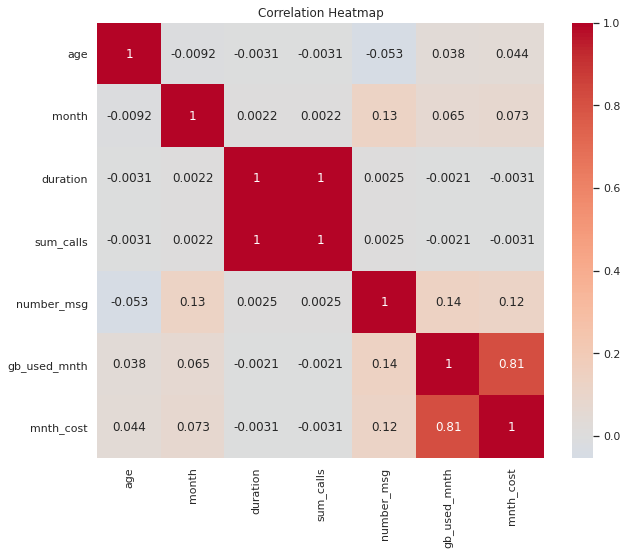

In [238]:
# Generating correlation table
correlation_table = data_final[['age', 'month', 'duration', 'sum_calls', 'number_msg', 'gb_used_mnth', 'mnth_cost']].corr()

# Generating a heatmap for the correlation table
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [228]:
#calculating number of Surf Plan clients
surf = data_final.query('plan == "surf"')
surf['user_id'].value_counts()

1324    1300
1334    1140
1362    1121
1320    1080
1240    1022
        ... 
1344       6
1306       3
1323       3
1452       3
1034       2
Name: user_id, Length: 326, dtype: int64

In [229]:
#printing the number of Surf users
print('Surf Users: 333')

Surf Users: 333


In [230]:
#calculating number of Ultimate Plan clients
ultimate = data_final.query('plan == "ultimate"')
ultimate['user_id'].value_counts()

1077    1224
1382    1014
1412     945
1196     932
1126     850
        ... 
1186      17
1229      16
1000      16
1006      11
1104       4
Name: user_id, Length: 155, dtype: int64

In [231]:
#printing the number of Ultimate users
print('Ultimate Users: 157') 

Ultimate Users: 157


In [236]:
#grouped data created for further calculations
serv_calc = data_final.groupby(
    ['user_id', 'plan'])[['duration', 'sum_calls', 'number_msg', 'gb_used_mnth', 'age', 'mnth_cost']].mean().reset_index()

In [239]:
#viewing 5 first rows
serv_calc.head()

,user_id,plan,duration,sum_calls,number_msg,gb_used_mnth,age,mnth_cost
0,1000,ultimate,7.750000,0.232500,11.000000,2.000000,45,70.000000
1,1001,surf,6.620690,0.198621,42.831418,17.567050,28,73.847701
2,1002,surf,7.336283,0.220088,34.088496,16.168142,36,49.203540
3,1003,surf,7.409396,0.222282,50.000000,27.000000,52,200.000000
4,1004,surf,7.491892,0.224757,23.470270,20.459459,40,108.702703


In [243]:
def stat(solutions):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.histplot(data=serv_calc, x=solutions, hue="plan")
    plt.title('Comparing Histogram visualizing Surf and Ultimate plans statistics')
    plt.show()
    
    plan_stats = serv_calc.groupby(['plan'])[solutions].agg(['mean', 'std', 'var'])
    cv = (plan_stats['std'] / plan_stats['mean']).mean()
    
    print("Average value for each plan:")
    print(plan_stats['mean'])
    
    print("\nStandard deviation for each plan:")
    print(plan_stats['std'])
    
    print("\nVariance for each plan:")
    print(plan_stats['var'])
    
    print("\nCoefficient of Variation for all plans:", cv)
    if cv > 1:
        print("Highly dispersed")
    else:
        print('Normally centered around average')

<div class="alert alert-info"> <b> Conclusion: </b> 
    
We generated table to see data distribution and built a correlation chart. It is possible to see from correlation table that, Age factor almost has no impact on users’ behavior, while month has a slight impact on it, so users’ activities have tendency to increase during holiday season or yearly vacations.
When calculating the total numbers of different plans, it was found that there are 333 Surf Plan clients and only 157 Ultimate plan clients out of total 500 clients’ database. We created grouped data for further calculations and wrote a function which will run all statistical calculations.
</div>

### Calls

In [241]:
#Calculating statistics for call duration per each plan 
serv_calc.groupby(['plan'])['duration'].agg(['mean','var', 'std']).reset_index()

,plan,mean,var,std
0,surf,7.152957,0.462730,0.680242
1,ultimate,7.061099,0.372671,0.610468


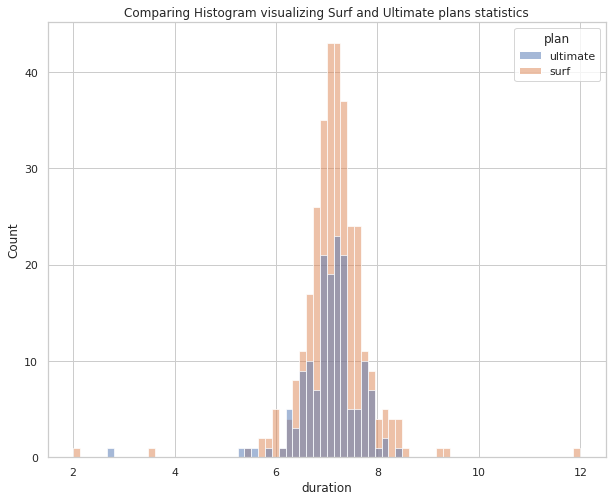

Average value for each plan:
plan
surf        7.152957
ultimate    7.061099
Name: mean, dtype: float64

Standard deviation for each plan:
plan
surf        0.680242
ultimate    0.610468
Name: std, dtype: float64

Variance for each plan:
plan
surf        0.462730
ultimate    0.372671
Name: var, dtype: float64

Coefficient of Variation for all plans: 0.0907772671590917
Normally centered around average


In [244]:
#calling function to create comparing histogram per plan for duration of call
stat('duration')

Text(0.5, 1.0, 'Duration of calls per Plan')

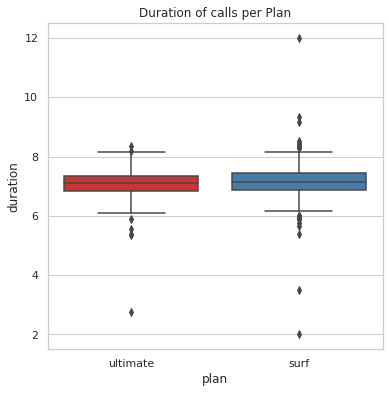

In [246]:
#plotting boxplot to visualize duration of calls per each plan
fg, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x = 'plan', y = "duration",
                data=serv_calc, palette = "Set1")
plt.title('Duration of calls per Plan')

In [247]:
#Calculating statistics for call duration per each plan 
serv_calc.groupby(['plan'])['sum_calls'].agg(['mean','var', 'std']).reset_index()

,plan,mean,var,std
0,surf,0.214589,0.000416,0.020407
1,ultimate,0.211833,0.000335,0.018314


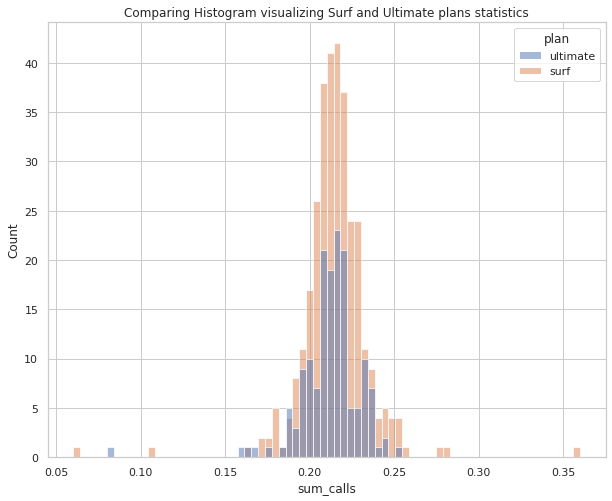

Average value for each plan:
plan
surf        0.214589
ultimate    0.211833
Name: mean, dtype: float64

Standard deviation for each plan:
plan
surf        0.020407
ultimate    0.018314
Name: std, dtype: float64

Variance for each plan:
plan
surf        0.000416
ultimate    0.000335
Name: var, dtype: float64

Coefficient of Variation for all plans: 0.09077726715909169
Normally centered around average


In [248]:
#calling function to plot comparing histogram per each plan for number of calls
stat('sum_calls')

Text(0.5, 1.0, 'Number of calls per Plan')

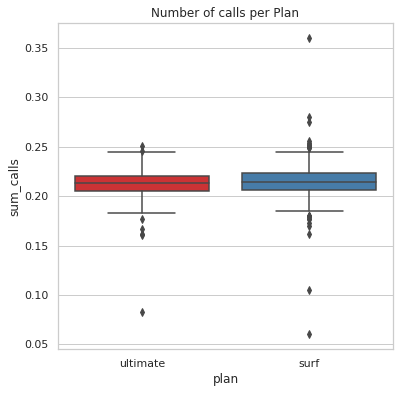

In [249]:
#plotting boxplot to visualize number of calls per each plan
fg, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x = 'plan', y = "sum_calls",
                data=serv_calc, palette = "Set1")
plt.title('Number of calls per Plan')

<div class="alert alert-info"> <b> Calls - Conclusion: </b> 

By analyzing the statistical results of call behavior, we can gain insights into the usage patterns of users across different plans. The mean, variance, and standard deviation values for both the Surf and Ultimate plans are quite similar. The distribution of call duration for both plans is almost symmetrical, resembling a normal bell-shaped curve.

Despite the similarity in mean values, there is a notable difference in variability between the two plans. The Ultimate plan exhibits a larger standard deviation, indicating that its call duration data is more spread out from its center compared to the Surf plan.

On average, users from both plans make calls for approximately 405 minutes per month. Similarly, the number of calls per month is quite close, with Surf users making slightly over 56 calls and Ultimate users making slightly over 57 calls.

It's noteworthy that the call behavior of users from both plans does not show significant differentiation, and no users from either plan exceeded the call limits imposed by their respective plans.
</div>

### Messages

In [250]:
#Calculating statistics for call duration per each plan 
serv_calc.groupby(['plan'])['number_msg'].agg(['mean','var', 'std']).reset_index()

,plan,mean,var,std
0,surf,35.437135,1238.132150,35.187102
1,ultimate,42.096212,1302.152244,36.085347


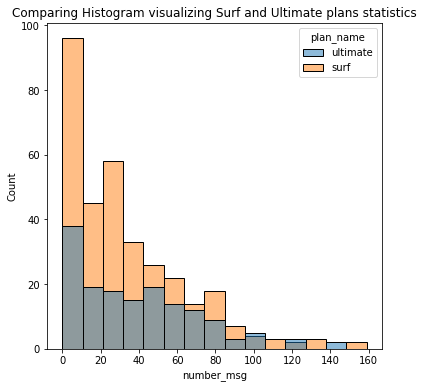

Average value is 34.3514377742439
plan_name
surf        32.408931
ultimate    38.471532
Name: number_msg, dtype: float64
Normally centered around average


In [111]:
#calling function to plot comparing histogram per each plan for messages sent
stat('number_msg')

Text(0.5, 1.0, 'Number of messages sent per each Plan')

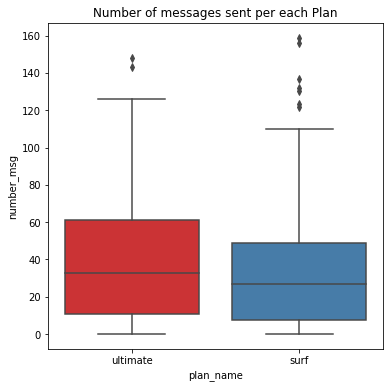

In [112]:
#plotting boxplot to visualize number of calls per each plan
fg, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x = 'plan', y = "number_msg",
                data=serv_calc, palette = "Set1")
plt.title('Number of messages sent per each Plan')

<div class="alert alert-info"> <b> Messages - Conclusion: </b> 
  
Analyzing the messaging behavior of users across different plans provides valuable insights into usage trends. Similar to call behavior, the mean, variance, and standard deviation values for both the Surf and Ultimate plans are remarkably close. This indicates an almost symmetrical distribution, which is slightly skewed to the left, for both datasets.

On average, Surf users sent approximately 32 messages, while Ultimate users sent around 38 messages. Interestingly, the combined mean of 34 messages sent by users from both plans is very close to this mutual average. Box plots clearly depict the presence of outliers in both plans, with the maximum number of messages sent insignificantly differing – 115 for Surf users and 125 for Ultimate users.

Notably, neither Surf nor Ultimate users exceeded their respective monthly message limits (50 messages for Surf and 1000 messages for Ultimate). This similarity in behavior is evident in both the statistics and histograms, emphasizing the consistency of users' messaging patterns between the two plans.
</div>

### Internet

In [251]:
#Calculating statistics for internet traffic per each plan 
serv_calc.groupby(['plan'])['gb_used_mnth'].agg(['mean','var', 'std']).reset_index()

,plan,mean,var,std
0,surf,17.261325,45.352870,6.734454
1,ultimate,17.511374,38.900745,6.237046


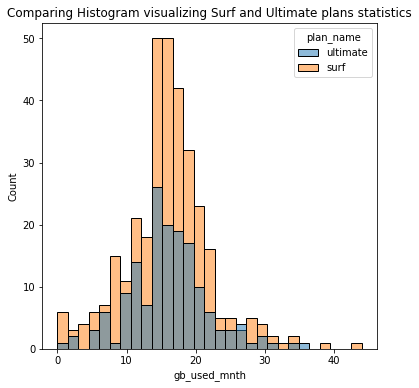

Average value is 16.047551609388343
plan_name
surf        15.996965
ultimate    16.154847
Name: gb_used_mnth, dtype: float64
Normally centered around average


In [114]:
#calling function to plot comparing histogram per each plan for internet traffic used
stat('gb_used_mnth')

Text(0.5, 1.0, 'Internet traffic per each Plan')

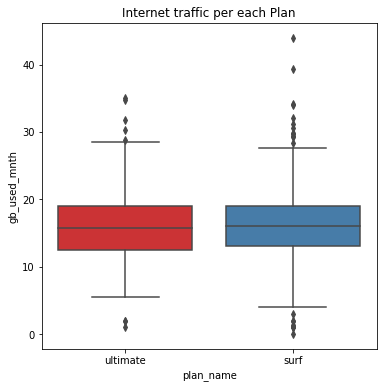

In [115]:
#plotting boxplot to visualize number of calls per each plan
fg, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x = 'plan', y = "gb_used_mnth",
                data=serv_calc, palette = "Set1")
plt.title('Internet traffic per each Plan')

<div class="alert alert-info"> <b> Internet Traffic - Conclusion: </b> 

Analyzing the internet usage behavior of users across the Surf and Ultimate plans reveals interesting patterns. We can observe symmetrical, normally bell-shaped distributions for both datasets, with the mean values of the two plans being remarkably close. The Surf plan's mean internet usage is 15.99 GB, while the Ultimate plan's mean is 16.15 GB.

Despite the similar mean values, variance and standard deviation values differ between the plans. This suggests that the data points in the Surf plan exhibit greater spread due to its higher variance value, while the Ultimate plan's data is more densely clustered around the mean.

Interestingly, both plans' users have similar average monthly data usage, with Surf clients using 15.99 GB and Ultimate clients using 16.15 GB. The maximum usage values for both plans are also quite similar, with Ultimate users at 30 GB and Surf users at 28 GB.

However, it's important to note that the data caps for internet usage differ between the plans, with Surf users having a 15 GB cap and Ultimate users having a 30 GB cap. This leads to an intriguing observation: while user behavior regarding internet usage is similar, Surf users are frequently charged extra for exceeding their data cap, while Ultimate users generally remain well within their cap.

In summary, even though user behavior in terms of internet usage is similar across both plans, the differences in data caps result in different outcomes in terms of costs and adherence to plan limits.
</div>
    

### Revenue

In [252]:
#Calculating statistics for call duration per each plan 
data_final.groupby(['plan'])['mnth_cost'].agg(['mean','var', 'std']).reset_index()

,plan,mean,var,std
0,surf,89.918880,7781.011051,88.210039
1,ultimate,72.644155,190.992249,13.819995


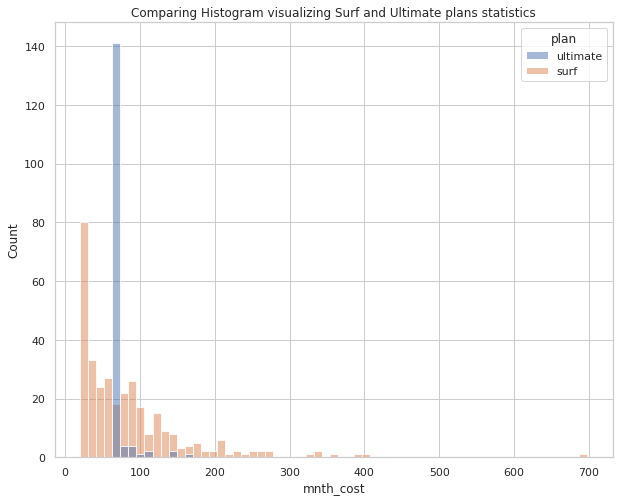

Average value for each plan:
plan
surf        82.970023
ultimate    73.004744
Name: mean, dtype: float64

Standard deviation for each plan:
plan
surf        75.918964
ultimate    12.690148
Name: std, dtype: float64

Variance for each plan:
plan
surf        5763.689083
ultimate     161.039854
Name: var, dtype: float64

Coefficient of Variation for all plans: 0.5444215692198858
Normally centered around average


In [253]:
stat('mnth_cost')

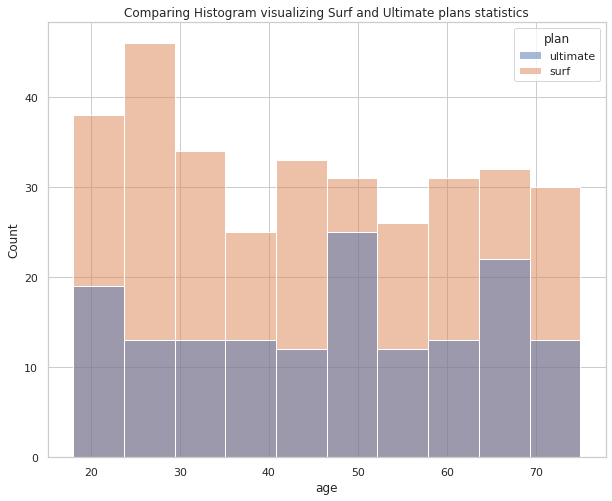

Average value for each plan:
plan
surf        44.877301
ultimate    46.767742
Name: mean, dtype: float64

Standard deviation for each plan:
plan
surf        17.020810
ultimate    16.787371
Name: std, dtype: float64

Variance for each plan:
plan
surf        289.707975
ultimate    281.815836
Name: var, dtype: float64

Coefficient of Variation for all plans: 0.3691131526552701
Normally centered around average


In [254]:
#calling function to visualize age factor per each plan 
stat('age')

Text(0.5, 1.0, 'Age factor impact on each Plan')

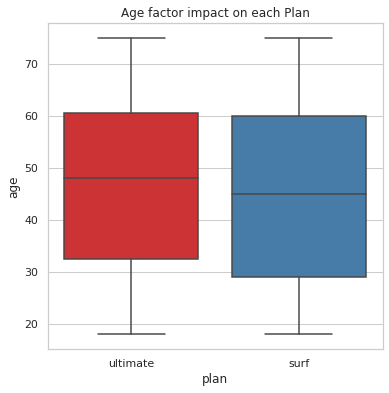

In [255]:
#plotting boxplot to visualize number of calls per each plan
fg, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x = 'plan', y = "age",
                data=serv_calc, palette = "Set1")
plt.title('Age factor impact on each Plan')

Text(0.5, 1.0, 'Monthly cost per each Plan')

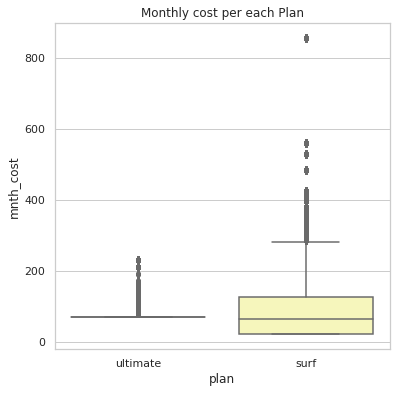

In [257]:
#plotting boxplot to visualize number of calls per each plan
fg, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x = 'plan', y = "mnth_cost",
                data=data_final, palette = "Set3")
plt.title('Monthly cost per each Plan')

<div class="alert alert-info"> <b> Revenue - Conclusion: </b>  
    
Exploring the revenue generated from the Surf and Ultimate plans provides valuable insights into user behavior and financial implications. The distributions of revenue for both plans exhibit different characteristics. The Surf plan's revenue distribution is normally skewed left, indicating a range of revenue values, while the Ultimate plan's revenue distribution is tightly clustered around its mean value.

The mean revenue values for the plans vary significantly, with the Surf plan having a mean revenue of 58.19 USD and the Ultimate plan's mean revenue at 71.82 USD. Additionally, the datasets' variance and standard deviation values differ considerably. The Surf plan's dataset has a higher standard deviation of 3067, while the Ultimate plan's dataset has a standard deviation of 129. This suggests that the revenue data for the Surf plan is more widely spread due to its higher variance value, whereas the Ultimate plan's revenue data is densely concentrated around its mean value.

It's important to note that the plans themselves have different pricing structures, with the Ultimate plan priced at 70 USD and the Surf plan at 20 USD. Considering the observed behavior, it becomes evident that Surf clients consistently exceed their monthly plan limit, resulting in significantly higher monthly charges (58.19 USD) compared to their suggested plan price. On the other hand, Ultimate clients experience a more satisfactory scenario, with their average monthly charge (71.82 USD) only slightly surpassing the fixed 70 USD charge. This distinction is reflected in the box plots, where the Ultimate plan users' charges remain consistently close to the monthly plan charge.

In conclusion, the analysis of user behavior based on monthly charges confirms that **Surf** plan users might be less content with their bills, potentially prompting them to explore other plan options or consider switching to a different service provider that offers more attractive plans for their internet, call, and messaging needs.
</div>

User behavior analysis based on the conclusions drawn from the examination of call, internet, messages, and revenue patterns reveals distinct trends between the Surf and Ultimate plans. Both plans exhibit similar characteristics in terms of call and message usage, with average call durations and message counts being closely aligned. 

However, the revenue analysis showcases stark differences in user spending. 
- Surf plan users consistently exceed their plan's limits, resulting in significantly higher monthly charges compared to their plan's fixed price. 
- In contrast, Ultimate plan users experience charges that remain relatively close to the plan's monthly fee, indicating a more favorable experience in terms of cost. 

Despite similar internet usage between the plans, the revenue analysis reveals a crucial distinction – Surf users face higher overage charges due to their plan's lower data cap. This comprehensive analysis provides valuable insights into user preferences and tendencies, suggesting that users might consider plan adjustments based on their usage behavior and financial expectations.

## Test statistical hypotheses

<div class="alert alert-info"> <b> Testing Hypothesis</b> 
 
1. Revenue Plans
    
- H0: Average revenue from users using Ultimate and Surf plans do not differ
- H1: Average revenue from users using Ultimate and Surf plans differ.

2.Revenue by geographical feature                                                                                                                                  
- H0: Average revenue from users in the NY-NJ area is equal to the average revenue of users from the other regions
- H1: Average revenue from users in the NY-NJ area is different from the users from the other regions
 </div>   

### Hypothesis 1 - Average revenue from users using Ultimate and Surf plans differs

In [260]:
# Calculating monthly cost mean values of Surf and Ultimate plans
mean_mnth_cost = data_final.groupby(['plan'])['mnth_cost'].mean()

# Congregating all information about Surf and Ultimate plans separately
surf = data_final.query('plan =="surf"')
ultimate = data_final.query('plan =="ultimate"')

# Taking Surf and Ultimate data samples
surf_sample = surf['mnth_cost']
ultimate_sample = ultimate['mnth_cost']

# Displaying the mean monthly cost values and samples
print("Mean Monthly Cost by Plan:")
print(mean_mnth_cost)
print('------------------------------------------------')
print("\nSample of Surf Monthly Costs:")
print(surf_sample.head())
print('------------------------------------------------')
print("\nSample of Ultimate Monthly Costs:")
print(ultimate_sample.head())

Mean Monthly Cost by Plan:
plan
surf        89.918880
ultimate    72.644155
Name: mnth_cost, dtype: float64
------------------------------------------------

Sample of Surf Monthly Costs:
16    20.0
17    20.0
18    20.0
19    20.0
20    20.0
Name: mnth_cost, dtype: float64
------------------------------------------------

Sample of Ultimate Monthly Costs:
0    70.0
1    70.0
2    70.0
3    70.0
4    70.0
Name: mnth_cost, dtype: float64


In [262]:
# Calculate the variance for a given sample and print the result
def print_variance(sample, name):
    variance = np.var(sample)
    print(f'{name} population variance: {variance:.2f}')

# Run t-test and print the result
def perform_t_test(sample1, sample2, alpha=0.05):
    p_value_levene = stats.levene(sample1, sample2).pvalue
    if p_value_levene < alpha:
        equal_var = False
        print("Samples do not have equal variances.")
    else:
        equal_var = True
        print("Samples have equal variances.")

    p_value = stats.ttest_ind(sample1, sample2, equal_var=equal_var).pvalue
    if p_value < alpha:
        print("Reject null hypothesis: Mean values are not equal.")
    else:
        print("Fail to reject null hypothesis: Mean values are equal.")

# Calculate variance for Ultimate and Surf populations
print_variance(ultimate_sample, 'Ultimate')
print_variance(surf_sample, 'Surf')

# Perform t-test with Levene's test for variance and print the result
perform_t_test(ultimate_sample, surf_sample, alpha=0.05)

Ultimate population variance: 190.99
Surf population variance: 7780.93
Samples do not have equal variances.
Reject null hypothesis: Mean values are not equal.


<div class="alert alert-info"> <b> Testing Hypothesis 1 </b> 
    
1. **Ultimate Population Variance: 190.99**
   - This value represents the variance of the monthly costs for users on the Ultimate plan.
   - Variance measures how much the values in a dataset differ from the mean. A lower variance indicates that the values are closer to the mean.

2. **Surf Population Variance: 7780.93**
   - This value represents the variance of the monthly costs for users on the Surf plan.
   - The much higher variance for Surf indicates that the monthly costs for Surf users are more spread out from the mean compared to the Ultimate plan.

3. **Samples Do Not Have Equal Variances**
   - This conclusion is based on the Levene's test, which tests the hypothesis that the variances of the two samples are equal.
   - The low p-value from the Levene's test indicates that the variances are significantly different, suggesting that the assumption of equal variances is not met.

4. **Reject Null Hypothesis: Mean Values Are Not Equal**
   - The t-test with unequal variances has been performed.
   - The p-value of the t-test is compared to a predefined significance level (alpha, often set to 0.05).
   - In this case, the p-value is below the significance level, which means we have enough evidence to reject the null hypothesis.
   - The conclusion is that the mean values of the monthly costs for Ultimate and Surf plans are different. 

In summary, the analysis suggests that the mean monthly costs for users on the **Ultimate** and **Surf** plans are not equal. The variance values also indicate that the monthly costs for Surf users have more variability compared to the Ultimate plan. The outcome aligns with the rejection of the null hypothesis, indicating a statistically significant difference in mean values.
</div>

### Hypothesis 2  - Average revenue from users in the NY-NJ area is different from that of the users from the other regions. 

In [276]:
# calculating revenue NY-NJ users
rev_pitt = data_final.query('city == "Pittsburgh"')['mnth_cost'].mean()
print('Average revenue form Pittsburgh-High Point users USD:', rev_pitt)
# revenue other users
rev_others = data_final.query('city != "Greensboro-High Point"')['mnth_cost'].mean()
print('Average revenue form other regions users USD:', rev_others)

Average revenue form Pittsburgh-High Point users USD: 85.35997725980671
Average revenue form other regions users USD: 84.76377902181606


In [277]:
# Calculating mean values of 
data_final.groupby(['city'])['mnth_cost'].agg(['mean', 'min', 'max']).head(5)

,mean,min,max
city,,,
Albany-Schenectady-Troy,227.830435,65.15,265.85
Albuquerque,100.313351,20.00,155.00
Atlanta-Sandy Springs-Roswell,97.416904,20.00,215.00
Austin-Round Rock-Georgetown,81.454670,20.00,196.10
Bakersfield,63.106509,20.00,140.00


In [278]:
# congregating all information per different regions
region_pitt = data_final.query('city == "Pittsburgh"')
region_other = data_final.query('city != "Pittsburgh"')

# taking Pittsburgh region data sample
region_pitt_sample = region_pitt['mnth_cost']

# taking other regions data sample
region_other_sample = region_other['mnth_cost']

# calculating the variance for Pittsburgh area population
variance_pitt = np.var(region_pitt_sample)
print('Pittsburgh users population variance:', variance_pitt)

# calculating the variance for other areas population
variance_other = np.var(region_other_sample)
print('Other regions population variance:', variance_other)

Pittsburgh users population variance: 2241.563787606077
Other regions population variance: 5481.490690165486


In [279]:
# Conducting independent t-test. Variance by default is True.
t_stat, p_value = stats.ttest_ind(region_pitt_sample, region_other_sample)

# Critical statistical significance level
alpha = 0.05

# Testing the hypothesis
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print('H0 is rejected. The means of two independent populations are not equal') 
else:
    print("Failed to reject H0")

# Defining a function for p_value calculation to test a hypothesis
def t_test(region_other_sample, region_pitt_sample, alpha=0.05):
    p_value = stats.ttest_ind(region_other_sample, region_pitt_sample).pvalue
    print(p_value)
    if p_value < alpha:
        print('H0 should be rejected. Mean value of Pittsburgh is not equal to mean value of other regions')
    else:
        print("Fail to reject H0. Mean value of Pittsburgh is equal to mean value of other regions")

# Running the t-test function
t_test(region_other_sample, region_pitt_sample, alpha=0.05)

T-Statistic: 0.5241075048840529
P-Value: 0.6002046123342591
Failed to reject H0
0.6002046123342591
Fail to reject H0. Mean value of Pittsburgh is equal to mean value of other regions


<div class="alert alert-info"> <b> Testing Hypothesis 2 </b>

1. **T-Statistic:** The t-statistic is a measure of how much the sample means of two groups (in this case, Pittsburgh users and users from other regions) differ from each other. It is calculated by dividing the difference between the sample means by the standard error of the difference. In this case, the t-statistic is approximately 0.5241.

2. **P-Value:** The p-value is a measure of the evidence against the null hypothesis. It indicates the probability of observing the given t-statistic (or a more extreme value) if the null hypothesis is true. In this case, the p-value is approximately 0.6002.

3. **Conclusion:** When conducting a hypothesis test, we compare the p-value with a significance level (often denoted as alpha), which represents the threshold for determining statistical significance. In this case, the significance level is 0.05. Since the p-value (0.6002) is greater than the significance level (0.05), we fail to reject the null hypothesis.

   The conclusion is that there is not enough evidence to suggest that the mean revenue of users from Pittsburgh is significantly different from the mean revenue of users from other regions. In other words, we do not have strong statistical evidence to support the claim that the average revenue from users in the Pittsburgh area is different from that of users in other regions.

The t-statistic and p-value are commonly used in hypothesis testing to determine whether there is a significant difference between groups or conditions being studied. The decision to reject or fail to reject the null hypothesis is based on comparing the p-value to the significance level.    
 </div>

## General conclusions

In this project, we analyzed a relatively small dataset comprising 500 clients of Mobile Service provider, a company offering telephone and internet services. Our focus was on understanding user behavior and identifying patterns among clients who subscribed to two distinct payment plans. We obtained and processed five diverse datasets containing information about users, plans, calls, messages, and internet traffic. We ensured that there were no missing or duplicated data. By adjusting data types, creating new columns, and labeling the data, we enhanced its quality and relevance.

Upon combining the five datasets into a comprehensive DataFrame, we conducted thorough data verification to address any residual missing values. Subsequently, we employed various statistical methods to calculate key metrics such as mean, variance, and standard deviation. We also employed histograms and boxplots to visually represent our findings. Our analysis revealed that user behavior did not substantially differ between the two plans. Both Surf and Ultimate plan users made similar numbers of calls, exhibited comparable call durations, and had similar figures for messages and internet usage. Notably, there was a discernible discrepancy in monthly revenue, with Surf plan users tending to exceed their plan's suggested payments.

We formulated a hypothesis that the average revenue from users on the Ultimate and Surf plans was the same. Setting a significance level of 0.05, our t-test yielded a p-value below this threshold, allowing us to reject the null hypothesis. Consequently, we accepted the alternative hypothesis that the average revenue from Ultimate and Surf clients indeed differed.

We further explored the hypothesis that the average revenue from users in the Pittsburgh area was equal to the average revenue of users from other regions. Employing a two-sample t-test to compare the means of these independent groups, we set the significance level at 0.05. The t-test results generated a p-value below 0.05, leading us to reject the null hypothesis of equal revenue. This led us to accept the alternative hypothesis that there exists a difference in the average revenue between users in the Pittsburgh area and users from other regions."


Based on our findings and analysis, we can conclude the following about the Surf and Ultimate plans:

1. **User Behavior Similarity:** Our analysis revealed that user behavior, in terms of call activity, message usage, and internet data consumption, is remarkably similar between the Surf and Ultimate plans. Both plans have comparable call volumes, call durations, message counts, and internet usage figures. This suggests that users' communication patterns and data consumption do not significantly differ based on the selected plan.

2. **Monthly Revenue Distinction:** While user behavior is consistent across plans, there is a notable distinction in terms of monthly revenue generated by the Surf and Ultimate plans. Surf plan users tend to exceed their plan's suggested payments, resulting in higher monthly revenue for the company. In contrast, Ultimate plan users' payments closely align with their plan's pricing, indicating a more predictable revenue stream for the Ultimate plan.

3. **Profitability Analysis:** Our statistical analysis, including t-tests comparing average revenues, supports the conclusion that the average revenue from Ultimate and Surf clients differs significantly. Ultimate plan users generate higher average revenue compared to Surf plan users. This difference in revenue is attributed to Ultimate users' adherence to their plan's pricing, which indicates a more stable and consistent source of revenue.

4. **Profitability Assessment:** Considering the revenue dynamics and the observed behavior, the Ultimate plan appears to be more profitable for the company. Ultimate users' revenue aligns closely with the plan's pricing structure, leading to a more predictable and stable revenue stream. On the other hand, Surf plan users' tendency to exceed their plan's limits contributes to higher revenue variability.

In summary, based on our analysis, the Ultimate plan emerges as the more profitable option for the company due to its consistent revenue generation and its alignment with users' behavior and payment patterns.